# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_temp = app_train[["CODE_GENDER", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY"]]
app_temp

,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,M,202500.0,406597.5,24700.5
1,F,270000.0,1293502.5,35698.5
2,M,67500.0,135000.0,6750.0
3,F,135000.0,312682.5,29686.5
4,M,121500.0,513000.0,21865.5
...,...,...,...,...
307506,M,157500.0,254700.0,27558.0
307507,F,72000.0,269550.0,12001.5
307508,F,153000.0,677664.0,29979.0
307509,F,171000.0,370107.0,20205.0


In [7]:
app_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CODE_GENDER       307511 non-null  object 
 1   AMT_INCOME_TOTAL  307511 non-null  float64
 2   AMT_CREDIT        307511 non-null  float64
 3   AMT_ANNUITY       307499 non-null  float64
dtypes: float64(3), object(1)
memory usage: 9.4+ MB


In [8]:
app_temp.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,3.075110e+05,3.075110e+05,307499.000000
mean,1.687979e+05,5.990260e+05,27108.573909
std,2.371231e+05,4.024908e+05,14493.737315
min,2.565000e+04,4.500000e+04,1615.500000
25%,1.125000e+05,2.700000e+05,16524.000000
50%,1.471500e+05,5.135310e+05,24903.000000
75%,2.025000e+05,8.086500e+05,34596.000000
max,1.170000e+08,4.050000e+06,258025.500000


In [10]:
app_temp["AMT_INCOME_TOTAL"].median()

147150.0

In [11]:
app_temp["AMT_CREDIT"].skew()

1.2347784971349398

In [12]:
app_temp["AMT_CREDIT"].kurt()

1.9340413008324937

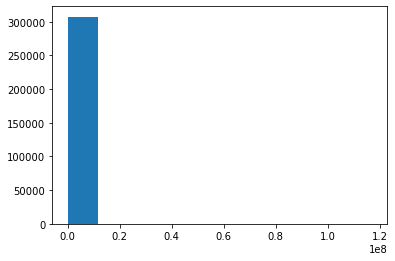

In [16]:
plt.hist(x=app_temp["AMT_INCOME_TOTAL"])
plt.show()